In [1]:
function Lagrange_interpolation(x_array, y_array, punkt)
    value = 0
    for x=1:length(x_array)
        licznik =1
        mianownik =1
        for k=1:length(x_array)
            if x != k
                licznik *= (punkt-x_array[k])
                mianownik *= (x_array[x]-x_array[k])
            end
        end
        value += y_array[x]*(licznik/mianownik)
    end
return value
end

Lagrange_interpolation (generic function with 1 method)

In [2]:
xs = 0:10
ys = rand(11)*13
calc_points = 0:0.1:10

0.0:0.1:10.0

In [3]:
lagrange_results = [Lagrange_interpolation(xs, ys, x) for x in calc_points]

101-element Array{Float64,1}:
   7.300762336634586 
 -19.64668275540038  
 -33.10319145220596  
 -37.21363621872374  
 -35.199888783977016 
 -29.516875470886916 
 -21.98845901401446  
 -13.925102917510854 
  -6.2251390939741444
   0.5386697898879281
   6.0457052815578445
  10.165755152933471 
  12.907624276810104 
   ⋮                 
   8.888970178961358 
   5.90526336042106  
   2.0136590892421733
  -2.7111746634544973
  -8.068807943001076 
 -13.688840500713106 
 -18.977623681176276 
 -23.054698837557936 
 -24.677633200638898 
 -22.153823269315648 
 -13.237719350355636 
   4.988197275454299 

In [4]:
using Plots

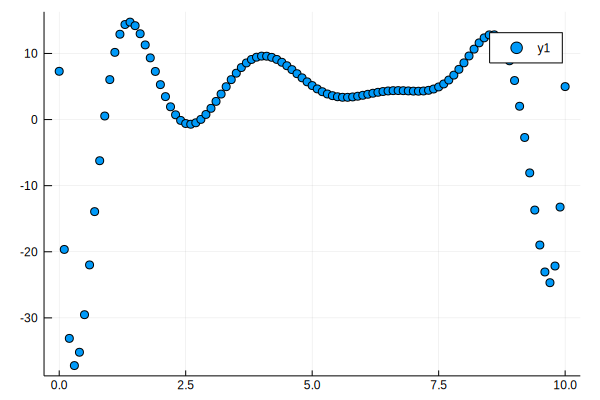

In [5]:
lagrange_scatter = scatter(calc_points, lagrange_results)

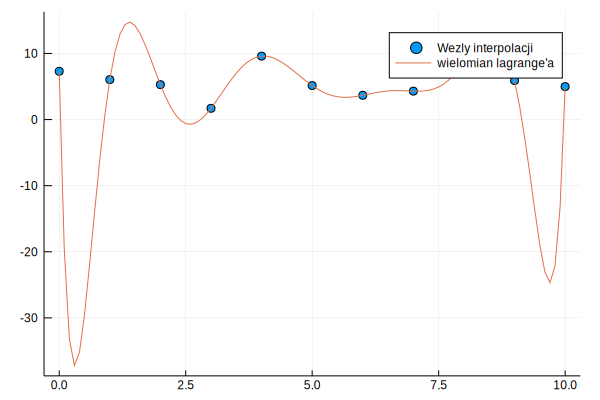

In [6]:
points = scatter(xs,ys, label="Wezly interpolacji")
lagrange_plot = plot!(calc_points, lagrange_results, label="wielomian lagrange'a")

In [7]:
function Newton_interpolation(xs, ys, punkty)
     function calc_diffs()
        x_diffs=[xs[i+1]-xs[i] for i=1:(length(xs)-1)]
        y_diffs=[ys[i+1]-ys[i] for i=1:(length(ys)-1)]
        values = []
        first_diffs = [y_diffs[i]/x_diffs[i] for i=1:length(x_diffs)]
        push!(values, first_diffs[1])
        new_array = [x for x in first_diffs]
        for i=2:(length(xs)-1)
            new_array = [(new_array[k+1]- new_array[k])/(xs[i+k]-xs[k]) for k=1:(length(new_array)-1)]
            push!(values, new_array[1])
        end
        return values
    end
    values = calc_diffs()
    wartosci = []
    for punkt in punkty
        polynomials = [punkt - xs[i] for i=1:(length(xs)-1)]
        buffer = 1
        target = ys[1]
        for i=1:(length(xs)-1)
            buffer *= polynomials[i]
            target += values[i]*buffer
        end
        push!(wartosci, target)
    end
    return wartosci
end

Newton_interpolation (generic function with 1 method)

In [8]:
newton_results = Newton_interpolation(xs, ys, calc_points)

101-element Array{Any,1}:
   7.300762336634586 
 -19.646682755400384 
 -33.103191452205955 
 -37.21363621872372  
 -35.19988878397703  
 -29.51687547088692  
 -21.98845901401446  
 -13.92510291751086  
  -6.225139093974147 
   0.5386697898879298
   6.0457052815578445
  10.165755152933466 
  12.907624276810104 
   ⋮                 
   8.888970178961586 
   5.905263360420349 
   2.0136590892405763
  -2.7111746634535834
  -8.068807943001786 
 -13.688840500712928 
 -18.97762368117472  
 -23.05469883755478  
 -24.67763320063449  
 -22.15382326931706  
 -13.237719350358475 
   4.988197275450602 

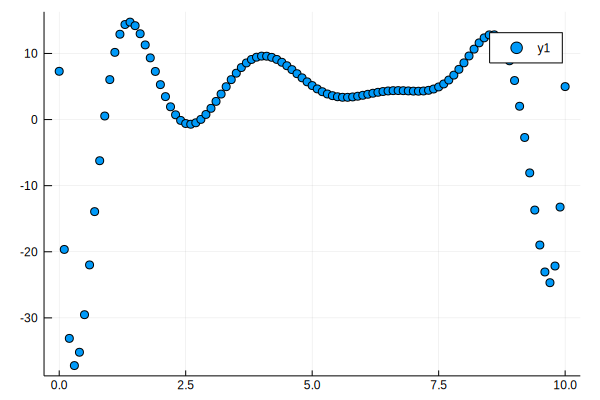

In [9]:
newton_scatter = scatter(calc_points, newton_results)

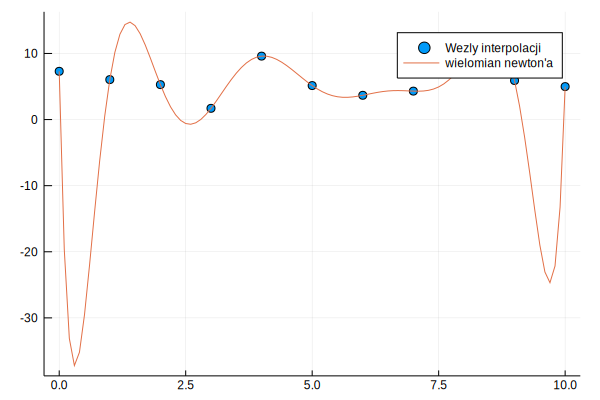

In [10]:
points = scatter(xs,ys, label="Wezly interpolacji")
newton_plot = plot!(calc_points, newton_results, label="wielomian newton'a")

In [11]:
runge_x = 0:20
runge_y = rand(21)*13
runge_points = 0:0.1:20

0.0:0.1:20.0

In [12]:
runge_lagrange_results = [Lagrange_interpolation(runge_x, runge_y, x) for x in runge_points]
runge_newton_results = Newton_interpolation(runge_x, runge_y, runge_points)

201-element Array{Any,1}:
      9.528805367341729
 -10592.268213927455   
 -14609.452596227366   
 -14774.238521545305   
 -12914.99814409626    
 -10208.628305547836   
  -7371.9152105131     
  -4804.824329406864   
  -2696.2264952968426  
  -1100.554014707666   
      7.795596053810941
    696.8766527505774  
   1052.1414634365674  
      ⋮                
    152.07264470091604 
      8.965610912884586
   -235.5657127544655  
   -604.3340430343997  
  -1111.5573554871153  
  -1752.5873895750701  
  -2488.3184414691787  
  -3222.3380595631315  
  -3768.329212192388   
  -3804.5533754097996  
  -2811.4111669572303  
     12.937048907042481

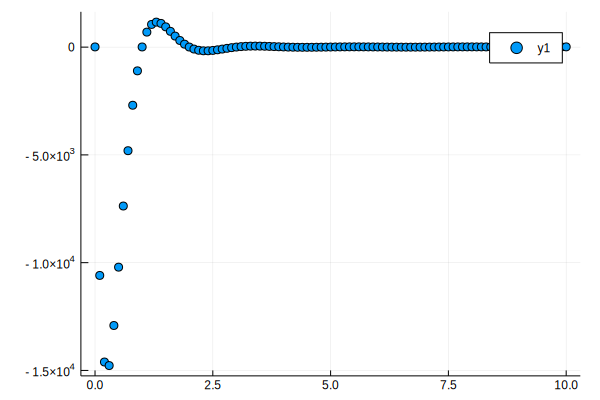

In [13]:
runge_lagrange_scatter = scatter(calc_points, runge_lagrange_results)

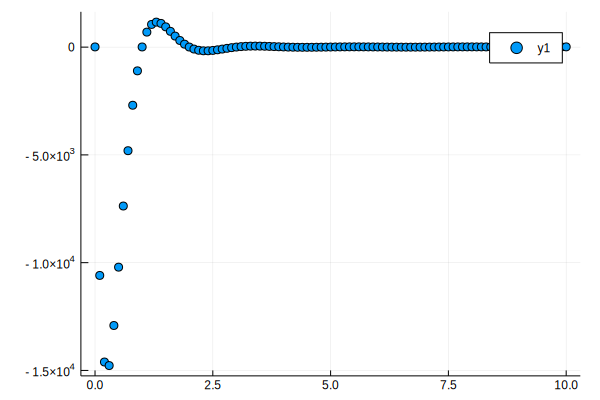

In [14]:
runge_newton_scatter = scatter(calc_points, runge_newton_results)

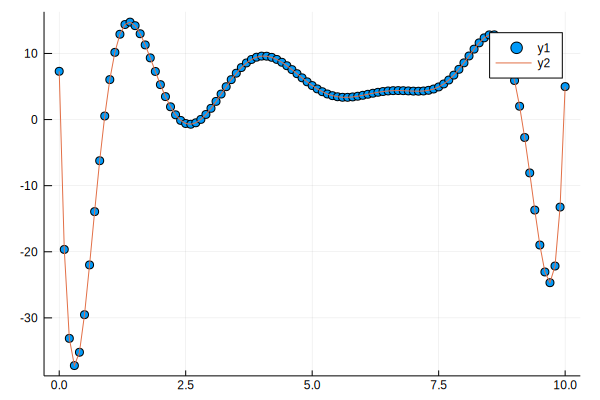

In [15]:
using Polynomials
fit = polyfit(xs,ys)
y = [fit(x) for x in calc_points]
scatter(calc_points, y)
plot!(calc_points, y)

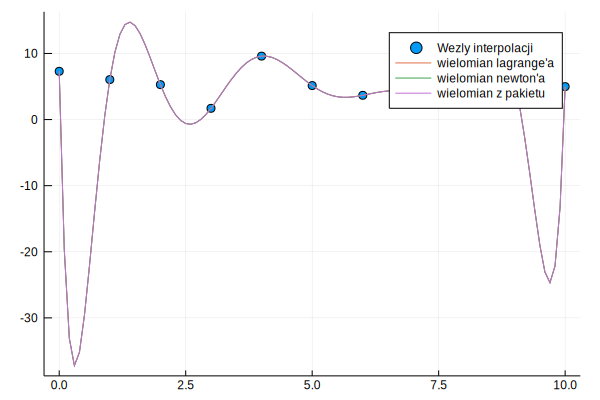

In [16]:
points = scatter(xs,ys, label="Wezly interpolacji")
plot!(calc_points, lagrange_results, label="wielomian lagrange'a")
plot!(calc_points, newton_results, label="wielomian newton'a")
plot!(calc_points, y, label="wielomian z pakietu")

In [17]:
function Lagrange_for_many_points(xs,ys,points)
    return results=[Lagrange_interpolation(xs,ys,point) for point in points]
end

Lagrange_for_many_points (generic function with 1 method)

In [18]:
function polys_interpolation(xs,ys,points)
    fit = polyfit(xs,ys)
    y = [fit(x) for x in points]
    return y
end

polys_interpolation (generic function with 1 method)

In [19]:
time=[]
method=[]
reply=[]
size=[]
for i=1:15
    for j=1:10
        xs = 1:(i*20)
        ys = rand(i*20)*4.223*i
        points = 0:0.1:(i*20)   
        push!(time, @elapsed Lagrange_for_many_points(xs,ys,points))
        push!(method, 1)
        push!(reply, j)
        push!(size, i*20)
        push!(time, @elapsed Newton_interpolation(xs,ys,points))
        push!(method, 2)
        push!(reply, j)
        push!(size, i*20)
        push!(time, @elapsed polys_interpolation(xs,ys,points))
        push!(method, 3)
        push!(reply, j)
        push!(size, i*20)
    end
end

In [20]:
time

450-element Array{Any,1}:
 0.131564926
 0.000311316
 0.007812654
 0.00049632 
 0.000588033
 4.6409e-5  
 0.000491736
 0.000566378
 4.0777e-5  
 0.000492356
 0.00056739 
 3.9589e-5  
 0.000491702
 ⋮          
 1.08450188 
 0.072875898
 0.004208322
 1.050156082
 0.0767183  
 0.004213152
 1.08901758 
 0.073462095
 0.007351809
 1.057644704
 0.074029334
 0.004217744

In [21]:
using DataFrames
using Statistics

In [22]:
df = DataFrame()
df[:time] = time
df[:method] = method
df[:reply] = reply
df[:size] = size
show(df)

450×4 DataFrame
│ Row │ time        │ method │ reply │ size │
│     │ Any         │ Any    │ Any   │ Any  │
├─────┼─────────────┼────────┼───────┼──────┤
│ 1   │ 0.131565    │ 1      │ 1     │ 20   │
│ 2   │ 0.000311316 │ 2      │ 1     │ 20   │
│ 3   │ 0.00781265  │ 3      │ 1     │ 20   │
│ 4   │ 0.00049632  │ 1      │ 2     │ 20   │
│ 5   │ 0.000588033 │ 2      │ 2     │ 20   │
│ 6   │ 4.6409e-5   │ 3      │ 2     │ 20   │
│ 7   │ 0.000491736 │ 1      │ 3     │ 20   │
⋮
│ 443 │ 0.0767183   │ 2      │ 8     │ 300  │
│ 444 │ 0.00421315  │ 3      │ 8     │ 300  │
│ 445 │ 1.08902     │ 1      │ 9     │ 300  │
│ 446 │ 0.0734621   │ 2      │ 9     │ 300  │
│ 447 │ 0.00735181  │ 3      │ 9     │ 300  │
│ 448 │ 1.05764     │ 1      │ 10    │ 300  │
│ 449 │ 0.0740293   │ 2      │ 10    │ 300  │
│ 450 │ 0.00421774  │ 3      │ 10    │ 300  │

In [23]:
newdf = DataFrame()
newdf[:size] = by(df, [:size, :method], x->mean(x.time))[:size]
newdf[:method] = by(df, [:size, :method], x->mean(x.time))[:method]
newdf[:mean] = by(df, [:size, :method], x->mean(x.time))[:x1]
newdf[:std] = by(df, [:size, :method], x->std(x.time))[:x1]
show(newdf)

45×4 DataFrame
│ Row │ size │ method │ mean        │ std         │
│     │ Any  │ Any    │ Float64     │ Float64     │
├─────┼──────┼────────┼─────────────┼─────────────┤
│ 1   │ 20   │ 1      │ 0.0135985   │ 0.0414492   │
│ 2   │ 20   │ 2      │ 0.000553895 │ 8.58677e-5  │
│ 3   │ 20   │ 3      │ 0.000819241 │ 0.00245724  │
│ 4   │ 40   │ 1      │ 0.00397515  │ 4.6324e-6   │
│ 5   │ 40   │ 2      │ 0.00378562  │ 0.0040956   │
│ 6   │ 40   │ 3      │ 0.000119472 │ 1.44409e-5  │
│ 7   │ 60   │ 1      │ 0.0136758   │ 0.00153324  │
⋮
│ 38  │ 260  │ 2      │ 0.0623904   │ 0.00950641  │
│ 39  │ 260  │ 3      │ 0.00356062  │ 0.000988721 │
│ 40  │ 280  │ 1      │ 0.869859    │ 0.0107294   │
│ 41  │ 280  │ 2      │ 0.0680797   │ 0.00281641  │
│ 42  │ 280  │ 3      │ 0.00372183  │ 3.31535e-5  │
│ 43  │ 300  │ 1      │ 1.06165     │ 0.0151479   │
│ 44  │ 300  │ 2      │ 0.0758189   │ 0.00303343  │
│ 45  │ 300  │ 3      │ 0.00451715  │ 0.000996184 │

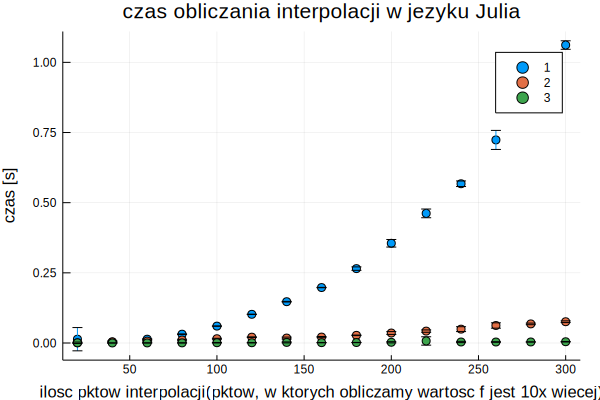

In [24]:
all_methods = scatter(newdf[:size], newdf[:mean], group=newdf[:method], yerr=newdf[:std],  xlabel = "ilosc pktow interpolacji(pktow, w ktorych obliczamy wartosc f jest 10x wiecej)", ylabel = "czas [s]", title = "czas obliczania interpolacji w jezyku Julia")

In [25]:
using Pkg
Pkg.add("Interpolations")
using Interpolations

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


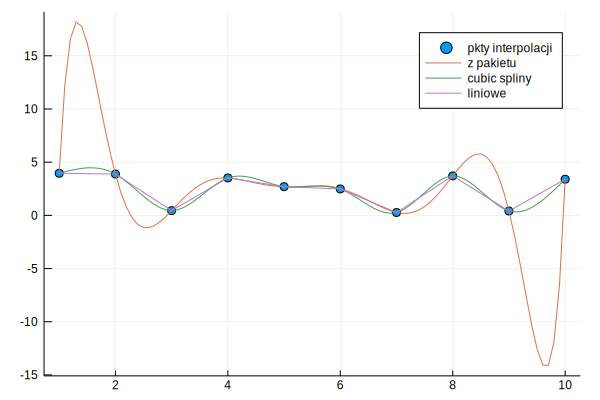

In [39]:
domain = 1:10
vals = rand(10)*4.32
points = 1:0.1:10
scatter(domain, vals, label="pkty interpolacji")
plot!(points, polys_interpolation(domain,vals, points), label="z pakietu")
cube = CubicSplineInterpolation(domain, vals)
cube_vals = [cube(x) for x in points]
plot!(points, cube_vals, label="cubic spliny")
linear = LinearInterpolation(domain, vals)
linear_vals = [linear(x) for x in points]
plot!(points, linear_vals, label="liniowe")

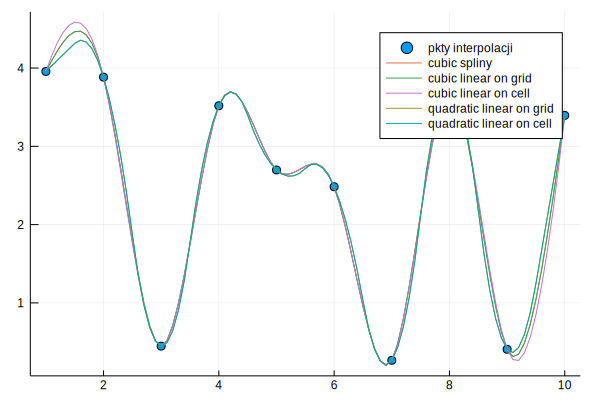

In [41]:
scatter(domain, vals, label="pkty interpolacji")
cube = CubicSplineInterpolation(domain, vals)
cube_vals = [cube(x) for x in points]
plot!(points, cube_vals, label="cubic spliny")
line_grid = interpolate(vals, BSpline(Cubic(Line(OnGrid()))))
grid_vals = [line_grid(x) for x in points]
plot!(points, grid_vals, label="cubic linear on grid")
line_cell = interpolate(vals, BSpline(Cubic(Line(OnCell()))))
cell_vals = [line_cell(x) for x in points]
plot!(points, cell_vals, label="cubic linear on cell")
quad_grid = interpolate(vals, BSpline(Quadratic(Line(OnGrid()))))
quad_grid_vals = [quad_grid(x) for x in points]
plot!(points, quad_grid_vals, label="quadratic linear on grid")
quad_line_cell = interpolate(vals, BSpline(Quadratic(Line(OnCell()))))
quad_cell_vals = [quad_line_cell(x) for x in points]
plot!(points, quad_cell_vals, label="quadratic linear on cell")

In [27]:
function mandelbrot(a)
    z = 0
    for i=1:10
        z = z^2 + a
    end
    return z
end
 
for y=1.0:-0.05:-1.0
    for x=-2.0:0.0315:0.5
        abs(mandelbrot(complex(x, y))) < 2 ? print("*") : print(" ")
    end
    println()
end

                                                                                
                                                                                
                                                            *                   
                                                        *  ***  *               
                                                        ********                
                                                       *********                
                                                         ******                 
                                             **    ** ************  *           
                                              *** *******************   *  *    
                                              *****************************     
                                              ****************************      
                                          ********************************      
                            